In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.scale as scale
import numpy as np
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
%matplotlib inline

In [2]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\SRUSugars.csv'
sru_positive_df = pd.read_csv(file, header=0, sep=';')
sru_positive_df = sru_positive_df[sru_positive_df.Frequency > 9]
print(sru_positive_df)

                                                   ID  \
0                                                 115   
1                                             263_264   
2                         111_136_158_165_265_293_294   
3   47_53_49_57_68_71_100_106_129_131_176_184_187_...   
4                                             311_313   
5   46_62_135_140_157_125_170_194_198_197_209_215_...   
6                                                 200   
7                                                 291   
8   18_104_156_144_163_160_161_162_210_211_277_286...   
9                                              24_173   
10                                             88_164   
11                   5_32_153_189_260_234_326_320_316   
12                      64_90_122_142_192_195_199_186   
13                                                193   
14                                     77_108_268_266   
15                                              21_22   
16                       78_73_

In [3]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\NonSRUSugars.csv'
sru_negative_df = pd.read_csv(file, header=0, sep=';')
sru_negative_df = sru_negative_df[sru_negative_df.Frequency > 9]
print(sru_negative_df)

                                    ID                          SMILES  \
0                              261_262                    OC1OCC(O)CC1   
1                                  220                 OC1OC(C)CC(O)C1   
2       44_48_56_58_97_169_205_308_309                 OC1OC(C)C(O)CC1   
3                     60_63_81_114_203                 OC1OC(C)C(N)CC1   
4                               95_138                 OC1OCC(N)C(O)C1   
5                       91_141_212_213              OC1OC(C)C(N)C(O)C1   
6                                   40               OCC1OCC(N)C(O)C1O   
7                                   14               OCC1OC(O)C(N)CC1O   
8                                   99                 OC1OC(C)CC(N)C1   
9                                  116                 OC1OCC(O)C(N)C1   
10           45_59_67_66_69_70_124_300              OC1OC(C)C(O)C(N)C1   
11                                  41                OC1OC(C)C(N)CC1N   
12                                 295

In [4]:
if len(sru_negative_df) > len(sru_positive_df):
    for i in range(0, len(sru_negative_df)-len(sru_positive_df)):
        sru_positive_df = sru_positive_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_positive_df)
if len(sru_positive_df) > len(sru_negative_df):
    for i in range(0, len(sru_positive_df)-len(sru_negative_df)):
        sru_negative_df = sru_negative_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_negative_df)

                                                   ID  \
0                                                 115   
1                                             263_264   
2                         111_136_158_165_265_293_294   
3   47_53_49_57_68_71_100_106_129_131_176_184_187_...   
4                                             311_313   
5   46_62_135_140_157_125_170_194_198_197_209_215_...   
6                                                 200   
7                                                 291   
8   18_104_156_144_163_160_161_162_210_211_277_286...   
9                                              24_173   
10                                             88_164   
11                   5_32_153_189_260_234_326_320_316   
12                      64_90_122_142_192_195_199_186   
13                                                193   
14                                     77_108_268_266   
15                                              21_22   
16                       78_73_

In [5]:
for entry in sru_negative_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_negative_df['ID'] = sru_negative_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_negative_df)

            ID                          SMILES  Frequency
0      261_262                    OC1OCC(O)CC1      49428
1          220                 OC1OC(C)CC(O)C1      47569
2     44_48...                 OC1OC(C)C(O)CC1      46668
3     60_63...                 OC1OC(C)C(N)CC1       1921
4       95_138                 OC1OCC(N)C(O)C1       1731
5    91_141...              OC1OC(C)C(N)C(O)C1       1703
6           40               OCC1OCC(N)C(O)C1O       1627
7           14               OCC1OC(O)C(N)CC1O       1513
8           99                 OC1OC(C)CC(N)C1       1226
9          116                 OC1OCC(O)C(N)C1        994
10    45_59...              OC1OC(C)C(O)C(N)C1        892
11          41                OC1OC(C)C(N)CC1N        739
12         295             OC1OC(C)C(N)C(O)C1N        734
13         177                OC1OC(C)CC(N)C1O        635
14       51_98                  O=C1CCC(O)OC1C        216
15           1                  OC1OC(CN)CCC1N        191
16   65_109...

In [6]:
for entry in sru_positive_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_positive_df['ID'] = sru_positive_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_positive_df)

            ID                         SMILES  Frequency
0          115                OC1OCC(O)C(O)C1      47825
1      263_264                OC1COC(O)C(O)C1      46074
2   111_136...               OC1OCC(O)C(O)C1O      45374
3     47_53...             OC1OC(C)C(O)C(O)C1      45328
4      311_313               OC1OC(C)C(O)CC1O      43500
5     46_62...            OC1OC(C)C(O)C(O)C1O      42905
6          200              OCC1OC(O)CC(O)C1O      39745
7          291            OCC1OC(O)C(O)C(O)C1      39109
8    18_104...           OCC1OC(O)C(O)C(O)C1O      39023
9       24_173               OC1OCC(O)C(O)C1N       1592
10      88_164            OC1OC(C)C(O)C(O)C1N       1564
11     5_32...           OCC1OC(O)C(N)C(O)C1O       1492
12    64_90...          OC1OC(C)C(O)C(O)(C)C1       1052
13         193         OC1OC(C)(C)C(O)C(O)C1O        789
14   77_108...         OC1OC(C)C(O)C(O)(C)C1O        598
15       21_22               OC1OCC(O)C(N)C1O        502
16    78_73...            OC1OC

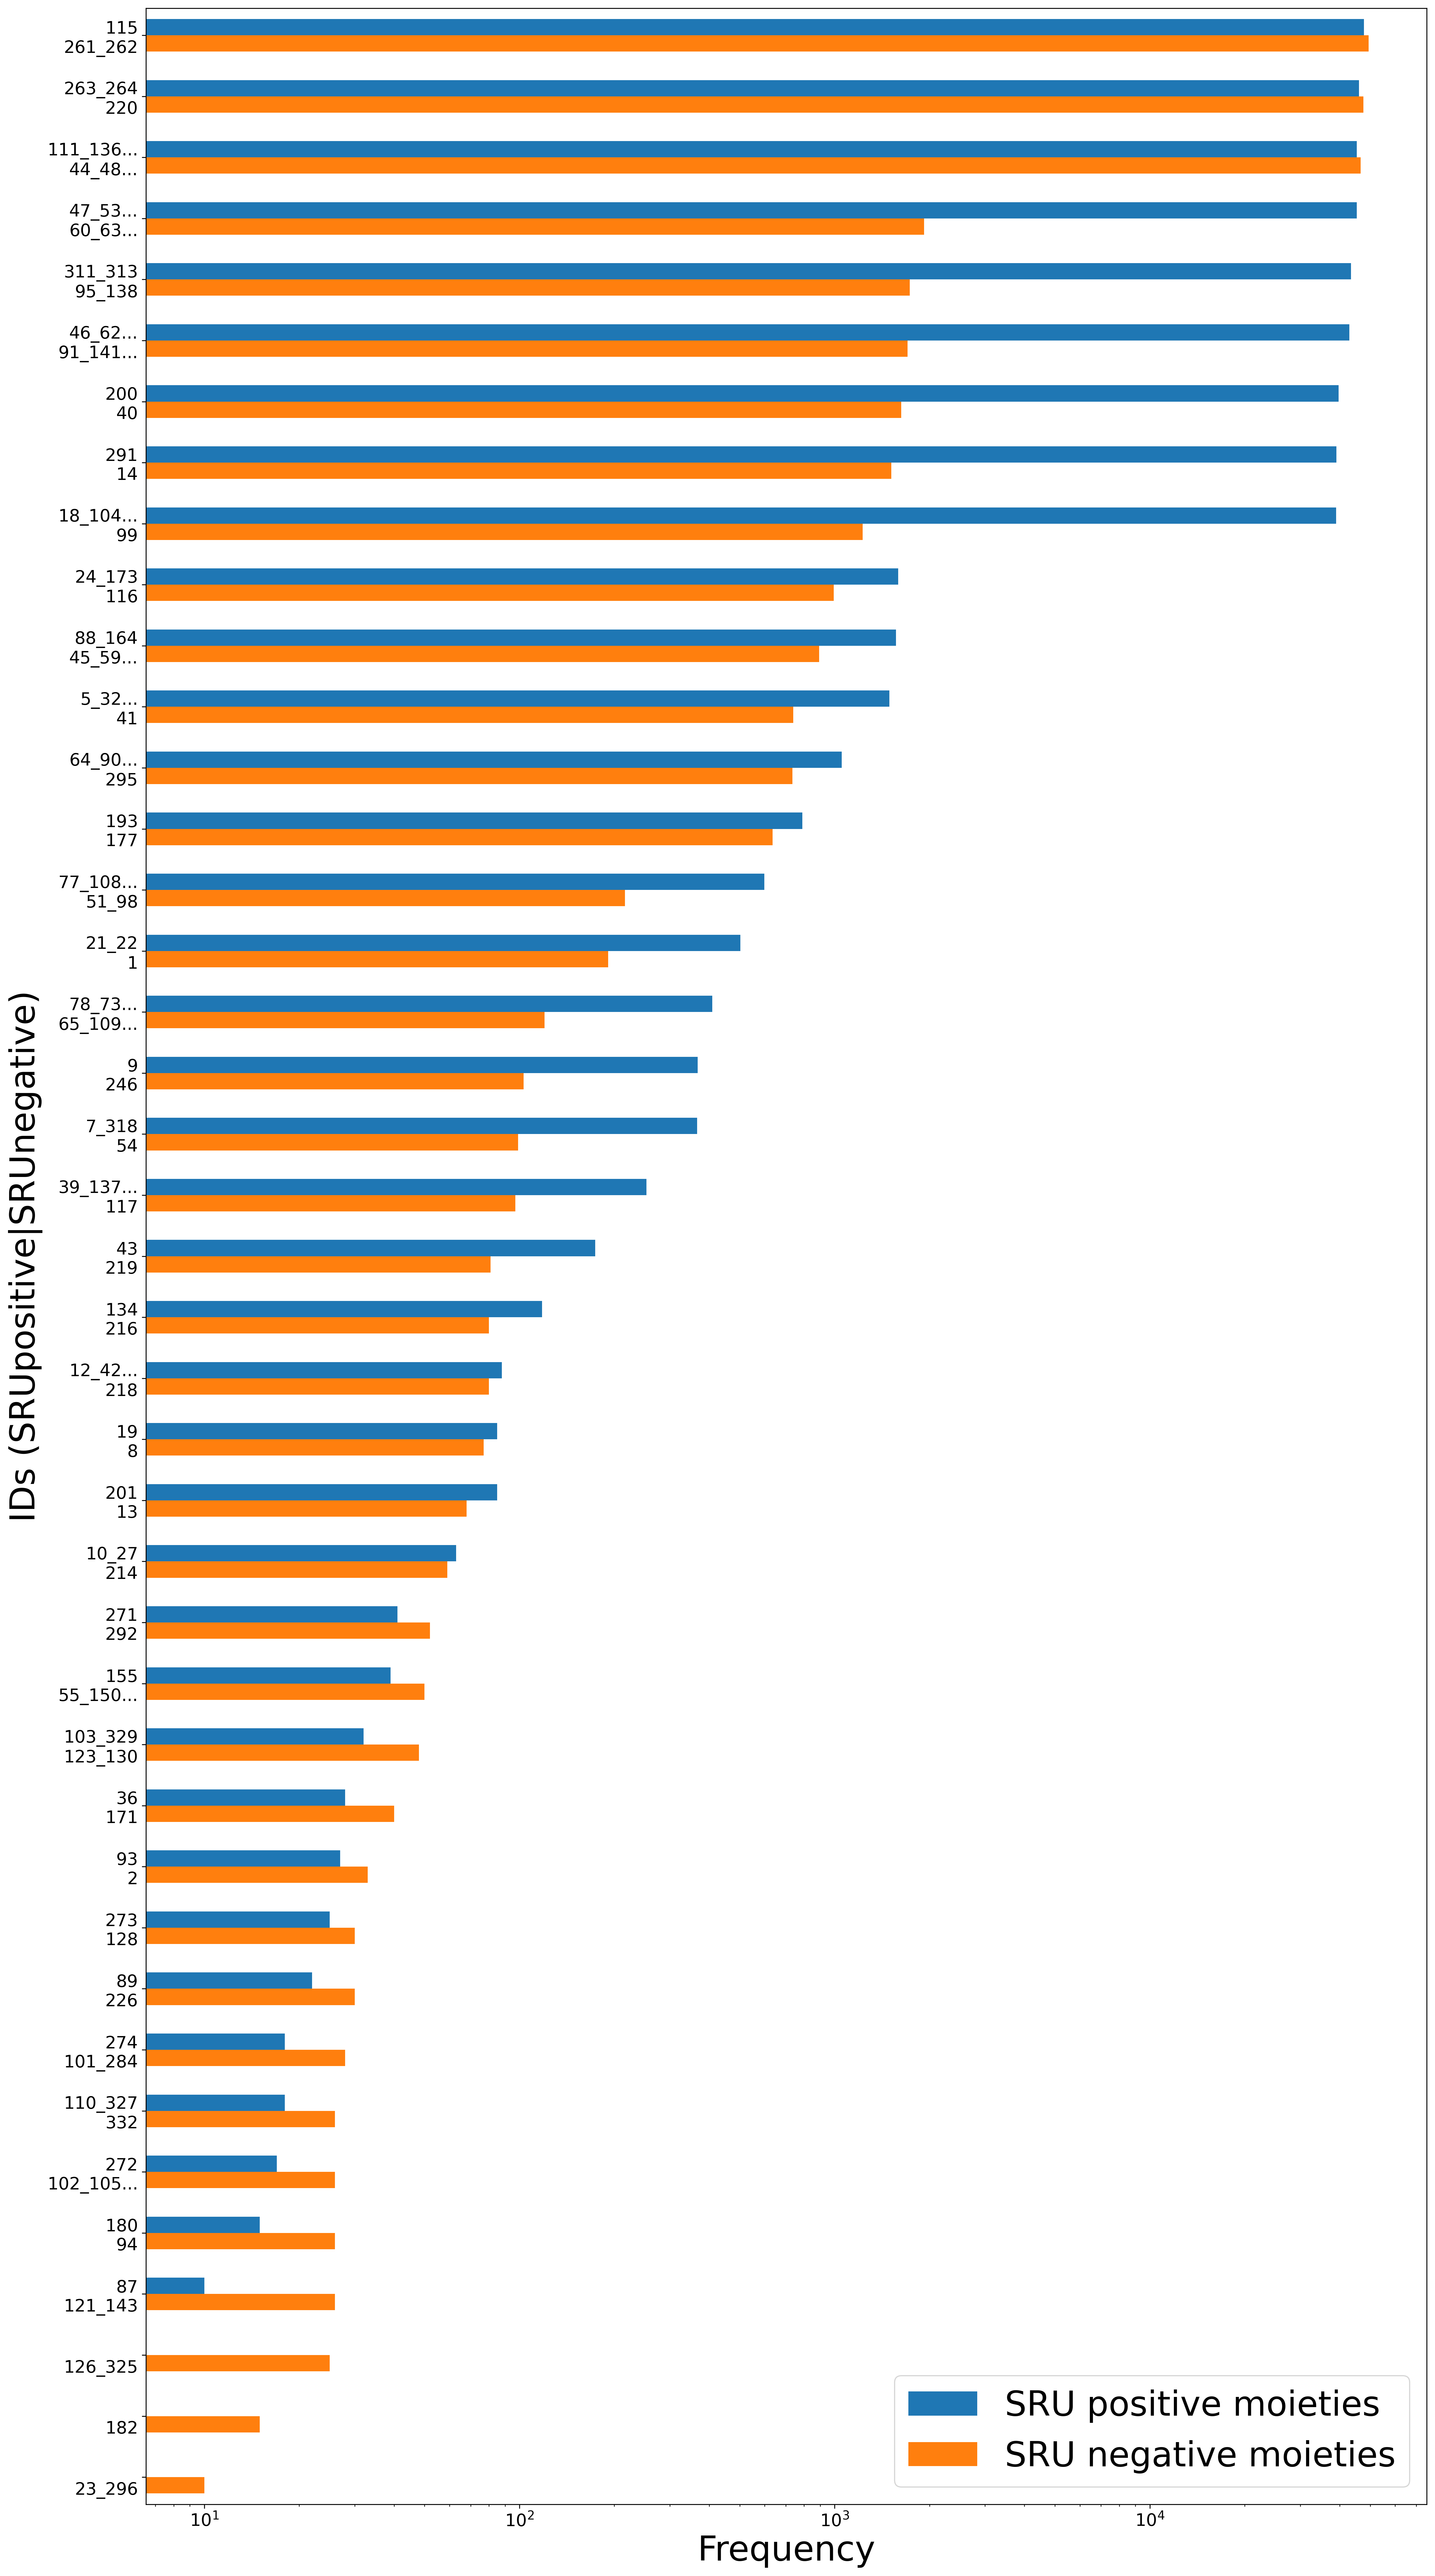

In [11]:
width = 1.2 #0.8
offset = 0.2
plt.rcParams.update({'font.size': 15}) #30
plt.rcParams.update({'lines.linewidth': 50}) 
fig, ax = plt.subplots(figsize=(20,40),dpi=300)

ids_sru_positive = sru_positive_df.ID.values
ids_sru_negative = sru_negative_df.ID.values
#this might need to be adjusted with new data, to see every bar in the figure!!
y_pos = np.arange(len(ids_sru_negative)) * 4.5 #5.1
frequencies_sru_positive = sru_positive_df.Frequency.values
frequencies_sru_negative = sru_negative_df.Frequency.values

ax.barh(y_pos-width, frequencies_sru_positive, height=width, align='edge', log=True)
ax.barh(y_pos, frequencies_sru_negative, height=width, align='edge', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(ids_sru_positive+"\n"+ids_sru_negative)
ax.set_ylim(-2, 182)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize=30)
ax.set_ylabel('IDs (SRUpositive|SRUnegative)', fontsize=30)
#ax.set_title('Matches in COCONUT', fontsize=30)
ax.legend(['SRU positive moieties', 'SRU negative moieties'], loc='lower right', fontsize=30)
plt.show()

In [12]:
fig.savefig("output\Review_sugar_moieties.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Review_sugar_moieties.png", 
            dpi = fig.dpi, bbox_inches = "tight")

In [129]:
sru_positive_molecules = [Chem.MolFromSmiles(smiles) for smiles in sru_positive_df.SMILES.values if smiles is not '']
for m in sru_positive_molecules: tmp = AllChem.Compute2DCoords(m)
identifiers = [x for x in sru_positive_df['ID'].to_list() if x is not '']
img=Draw.MolsToGridImage(sru_positive_molecules,molsPerRow=int(round(math.sqrt(len(sru_positive_molecules)))),subImgSize=(300,300), legends=identifiers)
img.save("output\SRU_positive_molecules.jpeg", bbox_inches = "tight")
img.save("output\SRU_positive_molecules.png", bbox_inches = "tight")
#img.show()

In [130]:
sru_negative_molecules = [Chem.MolFromSmiles(smiles) for smiles in sru_negative_df.SMILES.values if smiles is not '']
for m in sru_negative_molecules: tmp = AllChem.Compute2DCoords(m)
identifiers = [x for x in sru_negative_df['ID'].to_list() if x is not '']
img2=Draw.MolsToGridImage(sru_negative_molecules,molsPerRow=int(round(math.sqrt(len(sru_negative_molecules)))),subImgSize=(300,300), legends=identifiers)
img2.save("output\SRU_negative_molecules.jpeg", bbox_inches = "tight")
img2.save("output\SRU_negative_molecules.png", bbox_inches = "tight")
#img2.show()

### Same analysis with different SRU options:

In [13]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_nondefault_test\SRUSugars.csv'
sru_positive_df = pd.read_csv(file, header=0, sep=';')
sru_positive_df = sru_positive_df[sru_positive_df.Frequency > 9]
print(sru_positive_df)

                                ID                       SMILES  Frequency
0                          261_262                 OC1OCC(O)CC1      49428
1                              115              OC1OCC(O)C(O)C1      47825
2                              220              OC1OC(C)CC(O)C1      47569
3   44_48_56_58_97_169_205_308_309              OC1OC(C)C(O)CC1      46668
4                          263_264              OC1COC(O)C(O)C1      46074
..                             ...                          ...        ...
56                         110_327       OC1OC(C)C(N)C(O)(C)C1O         18
57                             272  O=C(C)C1(O)C(O)C(O)C(O)OC1C         17
58                             180     O=C(C)C1(O)CC(OC(O)C1O)C         15
59                              87       OC1OC(C)(C)C(N)C(O)C1O         10
60                          23_296             OC1OCC(O)C(N)C1N         10

[61 rows x 3 columns]


In [14]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_nondefault_test\NonSRUSugars.csv'
sru_negative_df = pd.read_csv(file, header=0, sep=';')
sru_negative_df = sru_negative_df[sru_negative_df.Frequency > 9]
print(sru_negative_df)

                  ID                          SMILES  Frequency
0   60_63_81_114_203                 OC1OC(C)C(N)CC1       1921
1                 99                 OC1OC(C)CC(N)C1       1226
2                 41                OC1OC(C)C(N)CC1N        739
3              51_98                  O=C1CCC(O)OC1C        216
4                  1                  OC1OC(CN)CCC1N        191
5                246                O=C1COC(O)C(O)C1        103
6                 54                 O=C1C=CC(O)OC1C         99
7                117               O=C1CC(O)C(O)OC1C         97
8                219              OC1OC(C)C(N)C(N)C1         81
9                216              O=CC=1OC(O)CC(O)C1         80
10               218           OC1OC(C)C(N)C(N)(C)C1         80
11               214  O=[N+]([O-])C1(C)CC(O)OC(C)C1N         59
12        55_150_151               O=C1CC(O)OC(C)C1O         50
13               171            O=C1C(O)C(O)OC(C)C1O         40
14                 2                 OC1

In [15]:
if len(sru_negative_df) > len(sru_positive_df):
    for i in range(0, len(sru_negative_df)-len(sru_positive_df)):
        sru_positive_df = sru_positive_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_positive_df)
if len(sru_positive_df) > len(sru_negative_df):
    for i in range(0, len(sru_positive_df)-len(sru_negative_df)):
        sru_negative_df = sru_negative_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_negative_df)

                  ID            SMILES  Frequency
0   60_63_81_114_203   OC1OC(C)C(N)CC1       1921
1                 99   OC1OC(C)CC(N)C1       1226
2                 41  OC1OC(C)C(N)CC1N        739
3              51_98    O=C1CCC(O)OC1C        216
4                  1    OC1OC(CN)CCC1N        191
..               ...               ...        ...
56                                              0
57                                              0
58                                              0
59                                              0
60                                              0

[61 rows x 3 columns]


In [16]:
for entry in sru_negative_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_negative_df['ID'] = sru_negative_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_negative_df)

          ID            SMILES  Frequency
0   60_63...   OC1OC(C)C(N)CC1       1921
1         99   OC1OC(C)CC(N)C1       1226
2         41  OC1OC(C)C(N)CC1N        739
3      51_98    O=C1CCC(O)OC1C        216
4          1    OC1OC(CN)CCC1N        191
..       ...               ...        ...
56                                      0
57                                      0
58                                      0
59                                      0
60                                      0

[61 rows x 3 columns]


In [17]:
for entry in sru_positive_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_positive_df['ID'] = sru_positive_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_positive_df)

          ID                       SMILES  Frequency
0    261_262                 OC1OCC(O)CC1      49428
1        115              OC1OCC(O)C(O)C1      47825
2        220              OC1OC(C)CC(O)C1      47569
3   44_48...              OC1OC(C)C(O)CC1      46668
4    263_264              OC1COC(O)C(O)C1      46074
..       ...                          ...        ...
56   110_327       OC1OC(C)C(N)C(O)(C)C1O         18
57       272  O=C(C)C1(O)C(O)C(O)C(O)OC1C         17
58       180     O=C(C)C1(O)CC(OC(O)C1O)C         15
59        87       OC1OC(C)(C)C(N)C(O)C1O         10
60    23_296             OC1OCC(O)C(N)C1N         10

[61 rows x 3 columns]


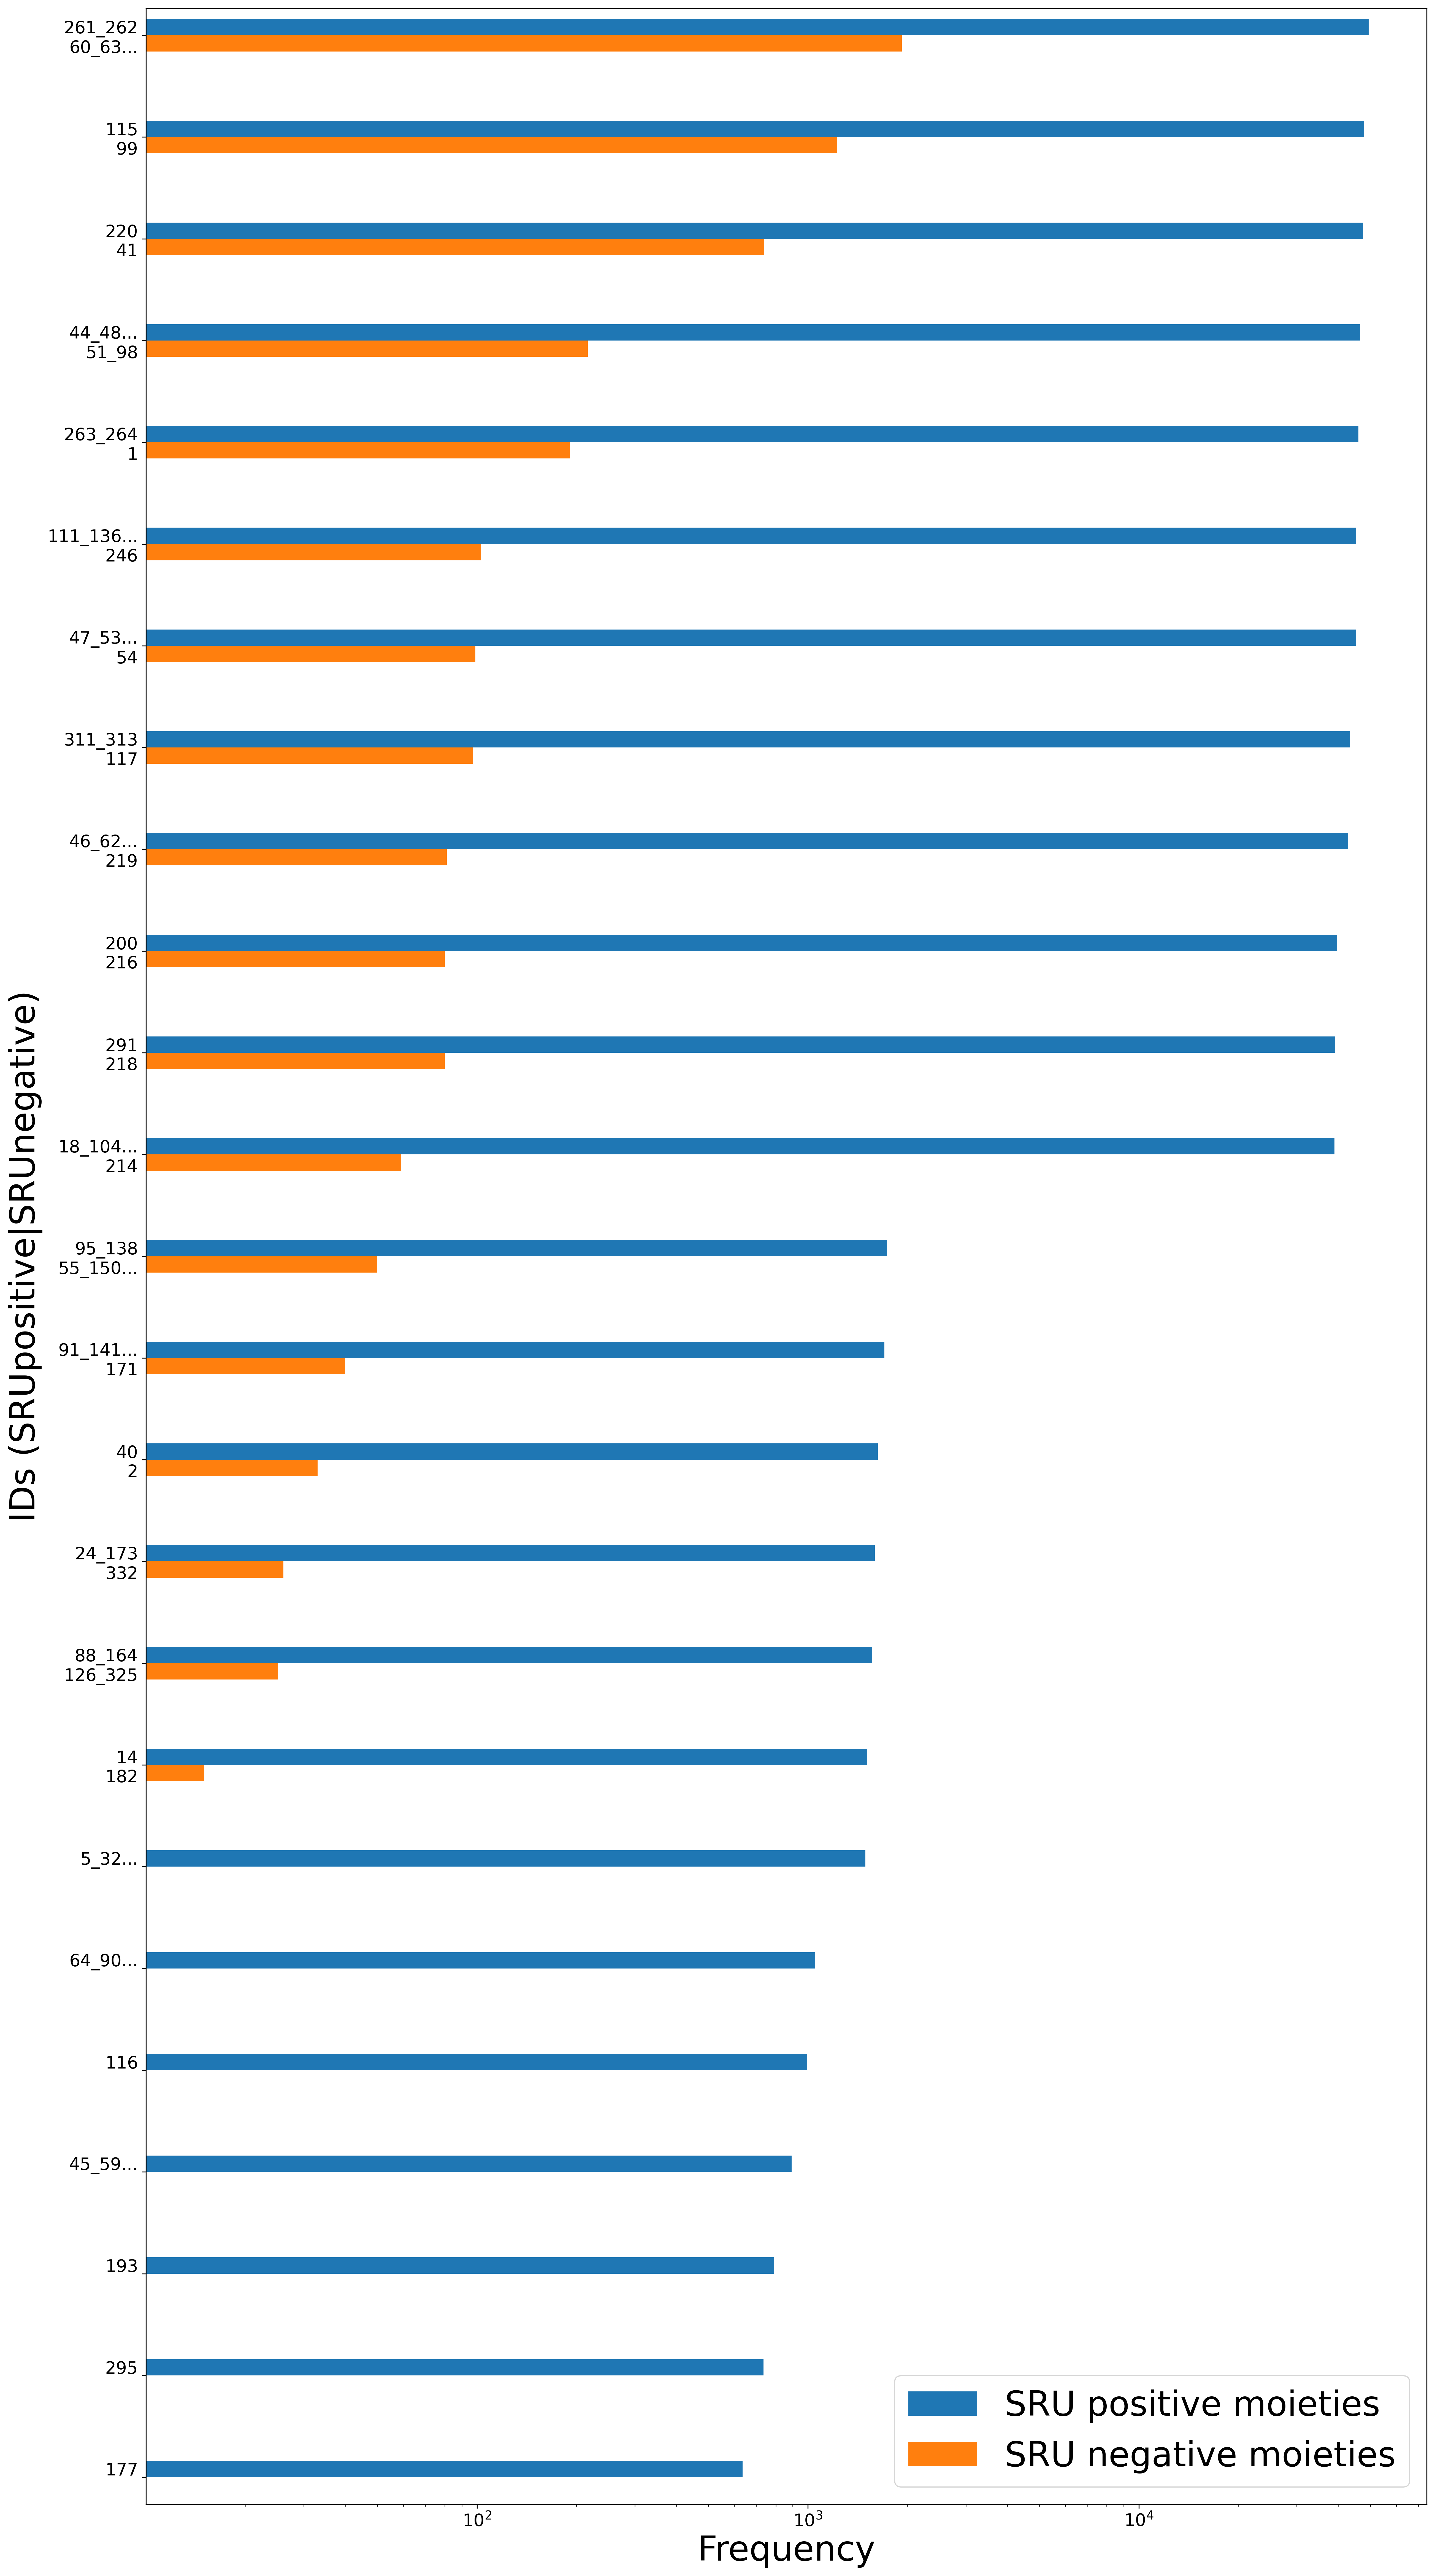

In [35]:
width = 1.2 #0.8
offset = 0.2
plt.rcParams.update({'font.size': 15}) #30
plt.rcParams.update({'lines.linewidth': 50}) 
fig, ax = plt.subplots(figsize=(20,40),dpi=300)

ids_sru_positive = sru_positive_df.ID.values[:25]
ids_sru_negative = sru_negative_df.ID.values[:25]
#this might need to be adjusted with new data, to see every bar in the figure!!
y_pos = np.arange(len(ids_sru_negative)) * 7.5
frequencies_sru_positive = sru_positive_df.Frequency.values[:25]
frequencies_sru_negative = sru_negative_df.Frequency.values[:25]

ax.barh(y_pos-width, frequencies_sru_positive, height=width, align='edge', log=True)
ax.barh(y_pos, frequencies_sru_negative, height=width, align='edge', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(ids_sru_positive+"\n"+ids_sru_negative)
ax.set_ylim(-2, 182)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize=30)
ax.set_ylabel('IDs (SRUpositive|SRUnegative)', fontsize=30)
#ax.set_title('Matches in COCONUT', fontsize=30)
ax.legend(['SRU positive moieties', 'SRU negative moieties'], loc='lower right', fontsize=30)
plt.show()

In [36]:
fig.savefig("output\Review_sugar_moieties_nondefault.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Review_sugar_moieties_nondefault.png", 
            dpi = fig.dpi, bbox_inches = "tight")

In [138]:
sru_positive_molecules = [Chem.MolFromSmiles(smiles) for smiles in sru_positive_df.SMILES.values if smiles is not '']
for m in sru_positive_molecules: tmp = AllChem.Compute2DCoords(m)
identifiers = [x for x in sru_positive_df['ID'].to_list() if x is not '']
img=Draw.MolsToGridImage(sru_positive_molecules,molsPerRow=int(round(math.sqrt(len(sru_positive_molecules)))),subImgSize=(300,300), legends=identifiers, maxMols=len(sru_positive_molecules))
img.save("output\SRU_positive_molecules_nondefault.jpeg", bbox_inches = "tight")
img.save("output\SRU_positive_molecules_nondefault.png", bbox_inches = "tight")
#img.show()

In [139]:
sru_negative_molecules = [Chem.MolFromSmiles(smiles) for smiles in sru_negative_df.SMILES.values if smiles is not '']
for m in sru_negative_molecules: tmp = AllChem.Compute2DCoords(m)
identifiers = [x for x in sru_negative_df['ID'].to_list() if x is not '']
img2=Draw.MolsToGridImage(sru_negative_molecules,molsPerRow=int(round(math.sqrt(len(sru_negative_molecules)))),subImgSize=(300,300), legends=identifiers)
img2.save("output\SRU_negative_molecules_nondefault.jpeg", bbox_inches = "tight")
img2.save("output\SRU_negative_molecules_nondefault.png", bbox_inches = "tight")
#img2.show()

### Calculating number of total matches

In [140]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\SRUSugars.csv'
sru_positive_df = pd.read_csv(file, header=0, sep=';')
default_total_sru_positive_matches = 0
for frequency in sru_positive_df.Frequency.values:
    default_total_sru_positive_matches += frequency
print(default_total_sru_positive_matches)

398813


In [141]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\NonSRUSugars.csv'
sru_negative_df = pd.read_csv(file, header=0, sep=';')
default_total_sru_negative_matches = 0
for frequency in sru_negative_df.Frequency.values:
    default_total_sru_negative_matches += frequency
print(default_total_sru_negative_matches)

159161


In [142]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_nondefault_test\SRUSugars.csv'
sru_positive_df = pd.read_csv(file, header=0, sep=';')
non_default_total_sru_positive_matches = 0
for frequency in sru_positive_df.Frequency.values:
    non_default_total_sru_positive_matches += frequency
print(non_default_total_sru_positive_matches)

552854


In [143]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_nondefault_test\NonSRUSugars.csv'
sru_negative_df = pd.read_csv(file, header=0, sep=';')
non_default_total_sru_negative_matches = 0
for frequency in sru_negative_df.Frequency.values:
    non_default_total_sru_negative_matches += frequency
print(non_default_total_sru_negative_matches)

5120
